In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv("nyc_data.csv")

In [3]:
data.tail()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
854053,D225B988186CB582C18391E1FE074B93,AE8F0E4642C61B014FB2E2658B83E98D,VTS,1,NaN,2013-01-15 8:53,2013-01-15 8:56,1,180,0.59,-73.986443,40.761776,-73.977486,40.033333
854054,C5140F6132BF157F7148A1FBDA2D47CE,5DEA778256AE9E0E76C391DE87FF3748,VTS,1,NaN,2013-01-15 18:18,2013-01-15 18:59,1,2460,19.19,-73.806664,40.653084,-73.984390,40.033333
854055,371C33EDD828B220ED89DB7B4256EA39,FAAC8812975EAB585B5A531C7DCEADD0,VTS,1,NaN,2013-01-15 22:51,2013-01-15 22:57,2,360,1.13,-74.232643,41.184307,-74.954437,39.817966
854056,371C33EDD828B220ED89DB7B4256EA39,FAAC8812975EAB585B5A531C7DCEADD0,VTS,1,NaN,2013-01-16 0:08,2013-01-16 0:15,2,420,1.68,-74.916664,39.696663,-74.916664,39.696663
854057,3074074E572AC65D2B2658DF7D9EFEFA,F2C09E96021763962A2B957CCB6159C6,VTS,1,NaN,2013-01-13 20:26,2013-01-13 20:28,5,120,0.32,-73.981148,40.772778,-73.978325,37.816666


In [4]:
data.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')

In [5]:
p_lat = data.pickup_latitude
p_long = data.pickup_longitude
d_lat = data.dropoff_latitude
d_long = data.dropoff_longitude
p_lat.tail()

854053    40.761776
854054    40.653084
854055    41.184307
854056    39.696663
854057    40.772778
Name: pickup_latitude, dtype: float64

In [6]:
def lat_long_to_pixels(lat, long):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi/2.0)/2.0))
    x = 100*(long + 180.0) / 360.0
    y = 100*(lat_rad - np.pi) / (2.0 * np.pi)
    return (x,y)

In [7]:
px, py = lat_long_to_pixels(p_lat, p_long)
px.tail()

854053    29.448210
854054    29.498149
854055    29.379821
854056    29.189816
854057    29.449681
Name: pickup_longitude, dtype: float64

In [8]:
px.count(), px.min(), px.max()

(854058, 28.77314888888889, 30.976852777777776)

In [9]:
px.mean(), px.median(), px.std()

(29.451623324138406, 29.44958583333333, 0.01085728154629855)

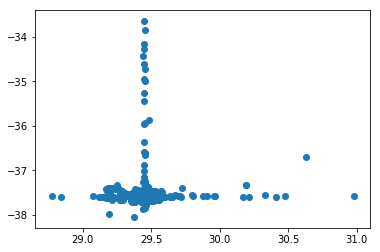

In [10]:
plt.scatter(px, py)

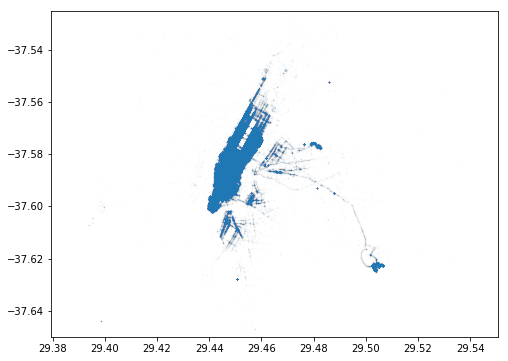

In [11]:
plt.figure(figsize = (8,6))
plt.scatter(px, py, s = 0.1, alpha = 0.03)
plt.axis("equal")
plt.xlim(29.40, 29.53)
plt.ylim(-37.65, -37.525)
plt.show()